# 1.&nbsp; 下载数据


In [4]:
!python --version

Python 3.7.15


In [1]:
# 下载数据
!wget https://img1.17img.cn/17img/files/202207/attachment/cebeb652-cc27-4a1c-9f1e-590cd093e640.rar

--2022-11-05 06:24:11--  https://img1.17img.cn/17img/files/202207/attachment/cebeb652-cc27-4a1c-9f1e-590cd093e640.rar
Resolving img1.17img.cn (img1.17img.cn)... 47.246.48.229, 47.246.48.225, 47.246.48.231, ...
Connecting to img1.17img.cn (img1.17img.cn)|47.246.48.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1194547 (1.1M) [application/x-rar-compressed]
Saving to: ‘cebeb652-cc27-4a1c-9f1e-590cd093e640.rar’

cebeb652-cc27-4a1c- 100%[===================>]   1.14M  --.-KB/s    in 0.03s   

2022-11-05 06:24:13 (36.3 MB/s) - ‘cebeb652-cc27-4a1c-9f1e-590cd093e640.rar’ saved [1194547/1194547]



In [ ]:
# 下载数据
!wget https://img1.17img.cn/17img/files/202207/attachment/cebeb652-cc27-4a1c-9f1e-590cd093e640.rar

--2022-08-10 23:54:59--  https://img1.17img.cn/17img/files/202207/attachment/cebeb652-cc27-4a1c-9f1e-590cd093e640.rar
Resolving img1.17img.cn (img1.17img.cn)... 8.45.176.230, 8.45.176.231, 8.45.176.232, ...
Connecting to img1.17img.cn (img1.17img.cn)|8.45.176.230|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1194547 (1.1M) [application/x-rar-compressed]
Saving to: ‘cebeb652-cc27-4a1c-9f1e-590cd093e640.rar’

cebeb652-cc27-4a1c- 100%[===================>]   1.14M  3.01MB/s    in 0.4s    

2022-08-10 23:55:00 (3.01 MB/s) - ‘cebeb652-cc27-4a1c-9f1e-590cd093e640.rar’ saved [1194547/1194547]



In [ ]:
# 查看当前工作目录
!pwd 
# 查看当前目录下文档
!ls

/content
cebeb652-cc27-4a1c-9f1e-590cd093e640.rar  sample_data


In [ ]:
# 解压到 data 文件夹
!unrar x "/content/cebeb652-cc27-4a1c-9f1e-590cd093e640.rar" "/content/data/"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/cebeb652-cc27-4a1c-9f1e-590cd093e640.rar

Creating    /content/data                                             OK
Extracting  /content/data/数据说明文档.docx                                      0%  OK 
Extracting  /content/data/近红外光谱数据_测试集.csv                                 21%  OK 
Extracting  /content/data/近红外光谱数据_训练集.csv                                 99%  OK 
All OK


In [ ]:
# 查看文件
!ls '/content/data/'

数据说明文档.docx  近红外光谱数据_测试集.csv  近红外光谱数据_训练集.csv


In [ ]:
# 查看数据说明文档
!pip install docx2txt
import docx2txt
my_text = docx2txt.process("/content/data/数据说明文档.docx")
print(my_text)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3980 sha256=063bf9f5c9aa852737b055773a6abe9bb24828eb8420fc2d90b6643292517355
  Stored in directory: /root/.cache/pip/wheels/b7/20/b2/473e3aea9a0c0d3e7b2f7bd81d06d0794fec12752733d1f3a8
Successfully built docx2txt
数据说明文档



1、近红外光谱数据_训练集.csv：

分析与建模所使用的数据集，其中每一行表示一个样本，前701列为近红外光谱的吸光度特征，最后一列为类别标签（共有A、B、C、D、E、F、G这七个类别）。

训练集共有 301 个样本。                                                              

2、近红外光谱数据_测试集.csv：

用于测试模型泛化性能的数据集，其中每一行表示一个样本，第一列为样本序号（从1开始），后701列为近红外光谱的吸光度特征，没有类别标签（需要模型给出预测标签）。

测试集共有 76 个样本。

3、预测结果

通过“近红外光谱数据_训练集.csv”建立7个分类模型，最后提交“近红外光谱数据_测试集.csv”中76个样本的类别预测值。


# 2.&nbsp;加载数据 & 数据预处理

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('/content/data/近红外光谱数据_训练集.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,692,693,694,695,696,697,698,699,700,701
0,0.154178,0.154086,0.153996,0.153911,0.153837,0.153781,0.153747,0.153735,0.153747,0.153782,...,0.295843,0.295752,0.295740,0.295835,0.295979,0.296110,0.296211,0.296301,0.296412,D
1,0.127070,0.127038,0.127011,0.126995,0.126993,0.127009,0.127042,0.127090,0.127155,0.127234,...,0.281233,0.281250,0.281316,0.281464,0.281672,0.281910,0.282145,0.282350,0.282535,D
2,0.121980,0.121984,0.121987,0.121988,0.121993,0.122012,0.122051,0.122111,0.122194,0.122299,...,0.299390,0.299297,0.299289,0.299401,0.299576,0.299749,0.299898,0.300038,0.300201,D
3,0.134686,0.134574,0.134487,0.134440,0.134425,0.134427,0.134427,0.134416,0.134407,0.134414,...,0.264262,0.264348,0.264485,0.264702,0.264972,0.265263,0.265554,0.265840,0.266138,D
4,0.123926,0.123958,0.123985,0.124006,0.124027,0.124056,0.124098,0.124154,0.124228,0.124322,...,0.266118,0.266159,0.266227,0.266358,0.266543,0.266762,0.266986,0.267182,0.267351,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.137316,0.137329,0.137320,0.137282,0.137234,0.137201,0.137205,0.137256,0.137341,0.137446,...,0.287021,0.287006,0.287061,0.287221,0.287429,0.287617,0.287776,0.287931,0.288115,B
297,0.152255,0.152161,0.152085,0.152041,0.152024,0.152025,0.152029,0.152029,0.152032,0.152048,...,0.301321,0.301288,0.301312,0.301409,0.301534,0.301641,0.301723,0.301804,0.301917,B
298,0.147079,0.147037,0.147003,0.146981,0.146976,0.146990,0.147024,0.147075,0.147140,0.147217,...,0.290555,0.290514,0.290493,0.290513,0.290581,0.290701,0.290846,0.290980,0.291099,B
299,0.136816,0.136812,0.136810,0.136811,0.136822,0.136849,0.136897,0.136964,0.137050,0.137152,...,0.280921,0.280794,0.280735,0.280771,0.280838,0.280863,0.280841,0.280812,0.280819,B


## 2.1&nbsp;光谱阵 （0 ~ 700 列）

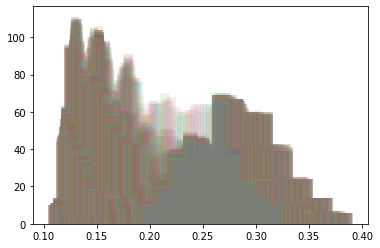

In [ ]:
# 查看光谱阵分布（0 ~ 700 列）
for i in range(701):
  plt.hist(df.iloc[:, i], alpha= 0.1)

In [ ]:
# 正则化
# Normalization   - rescales the values into a range of [0,1]
min = df.iloc[:,:-1].min(axis=0)
max = df.iloc[:,:-1].max(axis=0)
df_n = df.copy()
df_n.iloc[:,:-1] = (df.iloc[:,:-1] - min) / (max - min)
df_n

,0,1,2,3,4,5,6,7,8,9,...,692,693,694,695,696,697,698,699,700,701
0,0.660928,0.659911,0.658926,0.657952,0.657020,0.656170,0.655442,0.654834,0.654266,0.653650,...,0.781777,0.782012,0.782325,0.782699,0.783116,0.783572,0.784114,0.784825,0.785674,D
1,0.301921,0.301517,0.301290,0.301311,0.301498,0.301727,0.301884,0.301894,0.301769,0.301531,...,0.672253,0.672968,0.673595,0.674155,0.674859,0.675914,0.677244,0.678608,0.679817,D
2,0.234519,0.234555,0.234710,0.234969,0.235278,0.235577,0.235807,0.235941,0.236014,0.236064,...,0.808371,0.808665,0.809073,0.809635,0.810336,0.811161,0.812130,0.813279,0.814575,D
3,0.402792,0.401376,0.400365,0.399959,0.399928,0.399937,0.399661,0.398936,0.397908,0.396758,...,0.545027,0.545891,0.546719,0.547544,0.548496,0.549706,0.551194,0.552909,0.554744,D
4,0.260293,0.260708,0.261179,0.261699,0.262207,0.262630,0.262902,0.262998,0.262976,0.262901,...,0.558940,0.559504,0.559851,0.560056,0.560380,0.561075,0.562074,0.563122,0.563991,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.437611,0.437878,0.437918,0.437615,0.437122,0.436661,0.436441,0.436544,0.436789,0.436970,...,0.715647,0.716251,0.716899,0.717640,0.718419,0.719187,0.720027,0.721098,0.722382,B
297,0.635459,0.634412,0.633595,0.633170,0.633012,0.632919,0.632700,0.632233,0.631538,0.630653,...,0.822845,0.823629,0.824328,0.824801,0.825151,0.825507,0.825991,0.826719,0.827668,B
298,0.566904,0.566521,0.566246,0.566130,0.566151,0.566267,0.566440,0.566610,0.566684,0.566567,...,0.742136,0.742626,0.742773,0.742500,0.742271,0.742567,0.743355,0.744311,0.745144,B
299,0.430995,0.431032,0.431152,0.431372,0.431667,0.432004,0.432354,0.432679,0.432933,0.433069,...,0.669910,0.669544,0.669214,0.668920,0.668544,0.667978,0.667344,0.666901,0.666732,B


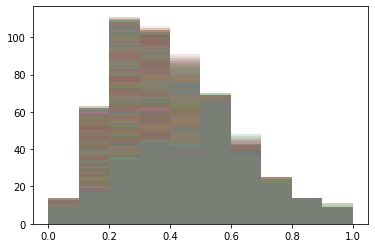

In [ ]:
# 查看正则化后的光谱阵分布（0 ~ 700 列）
for i in range(701):
  plt.hist(df_n.iloc[:, i], alpha= 0.1)

In [ ]:
# 标准化
# Standardization -  rescales data to have a mean of 0 and a standard deviation of 1
mean = df.iloc[:,:-1].mean(axis=0)
std = df.iloc[:,:-1].std(axis=0)
df_s = df.copy()
df_s.iloc[:,:-1] = (df.iloc[:,:-1] - mean) / std
df_s

,0,1,2,3,4,5,6,7,8,9,...,692,693,694,695,696,697,698,699,700,701
0,2.478884,2.475635,2.472272,2.468518,2.464637,2.461042,2.458147,2.456123,2.454654,2.453379,...,1.438341,1.436444,1.435827,1.436622,1.437493,1.437084,1.435514,1.433757,1.432461,D
1,-0.112514,-0.112357,-0.111738,-0.110513,-0.108826,-0.106894,-0.104929,-0.103111,-0.101562,-0.100398,...,0.911422,0.912034,0.912997,0.914589,0.916761,0.919388,0.921968,0.923764,0.924565,D
2,-0.599039,-0.595897,-0.592794,-0.590263,-0.588157,-0.586154,-0.583947,-0.581348,-0.578406,-0.575200,...,1.566281,1.564624,1.564444,1.566171,1.568422,1.569755,1.570143,1.570375,1.571125,D
3,0.615596,0.608735,0.604104,0.602852,0.603670,0.604633,0.603895,0.600555,0.595609,0.590251,...,0.299341,0.300896,0.302913,0.305664,0.308938,0.312491,0.316251,0.320232,0.324465,D
4,-0.412993,-0.407046,-0.401547,-0.396964,-0.393235,-0.390155,-0.387524,-0.385154,-0.382884,-0.380565,...,0.366277,0.366366,0.366059,0.365839,0.366100,0.367161,0.368535,0.369268,0.368835,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.866926,0.872318,0.875435,0.875162,0.872901,0.870696,0.870524,0.873260,0.877569,0.881888,...,1.120189,1.120189,1.121226,1.123725,1.126289,1.127475,1.127552,1.127777,1.128789,B
297,2.295044,2.291508,2.289250,2.289308,2.290854,2.292590,2.293281,2.292237,2.289837,2.286593,...,1.635917,1.636588,1.637798,1.639112,1.639686,1.638742,1.636748,1.634905,1.633946,B
298,1.800193,1.801257,1.802634,1.804508,1.806878,1.809698,1.812935,1.816392,1.819534,1.821804,...,1.247627,1.247032,1.245638,1.243287,1.241023,1.239903,1.239652,1.239233,1.238000,B
299,0.819176,0.822879,0.826550,0.830014,0.833409,0.836963,0.840895,0.845234,0.849604,0.853596,...,0.900151,0.895568,0.891931,0.889410,0.886384,0.881226,0.874392,0.867552,0.861782,B


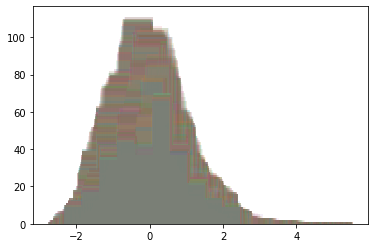

In [ ]:
# 查看标准化后的光谱阵分布（0 ~ 700 列）
for i in range(701):
  plt.hist(df_s.iloc[:, i], alpha= 0.1)

## 2.2 &nbsp;样本类别值（第701列）

In [ ]:
categories = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
cat_count = [sum(df.iloc[:,-1]==ele) for ele in categories]
print('categories:', categories)
print('cat_count:', cat_count)
print('sum:', sum(cat_count))

categories: ['A', 'B', 'C', 'D', 'E', 'F', 'G']
cat_count: [27, 27, 47, 20, 31, 75, 74]
sum: 301


Text(0.5, 0, 'Category')

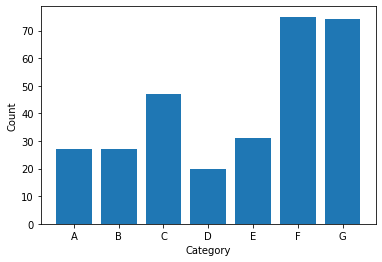

In [ ]:
# 绘制类别分布图 - 各类别分布不均匀
plt.bar(categories, cat_count)
plt.ylabel('Count')
plt.xlabel('Category')

# 3.&nbsp;基本模型

## 3.1. &nbsp;设置 X, y

In [ ]:
X = df.iloc[:, :-1]
X

,0,1,2,3,4,5,6,7,8,9,...,691,692,693,694,695,696,697,698,699,700
0,0.154178,0.154086,0.153996,0.153911,0.153837,0.153781,0.153747,0.153735,0.153747,0.153782,...,0.295932,0.295843,0.295752,0.295740,0.295835,0.295979,0.296110,0.296211,0.296301,0.296412
1,0.127070,0.127038,0.127011,0.126995,0.126993,0.127009,0.127042,0.127090,0.127155,0.127234,...,0.281203,0.281233,0.281250,0.281316,0.281464,0.281672,0.281910,0.282145,0.282350,0.282535
2,0.121980,0.121984,0.121987,0.121988,0.121993,0.122012,0.122051,0.122111,0.122194,0.122299,...,0.299474,0.299390,0.299297,0.299289,0.299401,0.299576,0.299749,0.299898,0.300038,0.300201
3,0.134686,0.134574,0.134487,0.134440,0.134425,0.134427,0.134427,0.134416,0.134407,0.134414,...,0.264162,0.264262,0.264348,0.264485,0.264702,0.264972,0.265263,0.265554,0.265840,0.266138
4,0.123926,0.123958,0.123985,0.124006,0.124027,0.124056,0.124098,0.124154,0.124228,0.124322,...,0.266040,0.266118,0.266159,0.266227,0.266358,0.266543,0.266762,0.266986,0.267182,0.267351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.137316,0.137329,0.137320,0.137282,0.137234,0.137201,0.137205,0.137256,0.137341,0.137446,...,0.287015,0.287021,0.287006,0.287061,0.287221,0.287429,0.287617,0.287776,0.287931,0.288115
297,0.152255,0.152161,0.152085,0.152041,0.152024,0.152025,0.152029,0.152029,0.152032,0.152048,...,0.301365,0.301321,0.301288,0.301312,0.301409,0.301534,0.301641,0.301723,0.301804,0.301917
298,0.147079,0.147037,0.147003,0.146981,0.146976,0.146990,0.147024,0.147075,0.147140,0.147217,...,0.290587,0.290555,0.290514,0.290493,0.290513,0.290581,0.290701,0.290846,0.290980,0.291099
299,0.136816,0.136812,0.136810,0.136811,0.136822,0.136849,0.136897,0.136964,0.137050,0.137152,...,0.281030,0.280921,0.280794,0.280735,0.280771,0.280838,0.280863,0.280841,0.280812,0.280819


In [ ]:
y = df.iloc[:,-1]
# 使用[0,1,2,...] 代替 ['A', 'B', 'C', ...]
for i, cat in enumerate(categories):
    y = y.replace(cat, i)
y

0      3
1      3
2      3
3      3
4      3
      ..
296    1
297    1
298    1
299    1
300    1
Name: 701, Length: 301, dtype: int64

## 3.2 &nbsp;划分训练集、测试集

In [ ]:
from sklearn.model_selection import train_test_split
print('X.shape:', X.shape)
sample_num = X.shape[0]
train_ratio = 2/3

idx = range(sample_num)
train_size =int(train_ratio * sample_num)
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, idx, train_size=train_size, 
    stratify=y, # 使训练集、测试集中各个类别个数相同 https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
    shuffle=True,
    random_state=42)

print('X_train.shape:', X_train.shape)
print('y_train.shape:', y_train.shape)
print('X_test.shape:', X_test.shape)
print('y_test.shape:', y_test.shape)

X.shape: (301, 701)
X_train.shape: (200, 701)
y_train.shape: (200,)
X_test.shape: (101, 701)
y_test.shape: (101,)


## 3.3 &nbsp;预测模型

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10, random_state=5)

# 训练模型
clf.fit(X_train, y_train)

# 预测
y_pred = clf.predict(X_test)

# 识别准确率
accuracy = sum(y_pred==y_test)  / len(y_test)
accuracy

0.44554455445544555

In [ ]:
# 识别准确率 = score
score = clf.score(X_test, y_test)
score

0.44554455445544555

## 3.4 &nbsp;交叉验证

In [ ]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=10, random_state=0)
print(cross_val_score(clf, X, y, cv=3))
# 默认交叉验证函数 - cross_val_score 划分并未考虑按照类别个数均匀划分训练集与测试集
# 故精度变化较大

[0.1980198 0.38      0.41     ]


In [ ]:
# 手动划分 - 考虑按照类别个数均匀划分训练集与测试集
from sklearn.model_selection import StratifiedKFold
import numpy as np
# https://scikit-learn.org/stable/modules/cross_validation.html#stratified-k-fold

cv = 3
skf = StratifiedKFold(n_splits=cv, random_state=32, shuffle=True)
val_score = []

k = 1
for train_index, test_index in skf.split(X, y):
  # 查看各个类别个数
  # print('train -  {}   |   test -  {}'.format(
  #     np.bincount(y[train_index]), np.bincount(y[test_index])))
  X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
  y_train, y_test = y[train_index], y[test_index]
  
  # 训练模型
  clf = RandomForestClassifier(max_depth=5, random_state=0)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = sum(y_pred==y_test)  / len(y_test)
  val_score.append(accuracy)

  print(f'Cross Validation: {k} - Accuracy: {accuracy}')
  k += 1

val_score = pd.DataFrame(data = np.array([val_score+[np.mean(val_score)]]), 
                             index=['accuracy'],
                             # CV -- Cross Validation
                            columns=['CV_'+str(i) for i in range(1, cv+1)]+['Mean'])
val_score

Cross Validation: 1 - Accuracy: 0.4752475247524752
Cross Validation: 2 - Accuracy: 0.42
Cross Validation: 3 - Accuracy: 0.44


,CV_1,CV_2,CV_3,Mean
accuracy,0.475248,0.42,0.44,0.445083


In [ ]:
# 封装 交叉验证函数
def cross_val(X, y, clf, cv, random_state=32, shuffle=True):
  
  skf = StratifiedKFold(n_splits=cv, random_state=random_state, shuffle=shuffle)
  val_score = []

  k = 1
  X = np.array(X)
  for train_index, test_index in skf.split(X, y):
    # 查看各个类别个数
    # print('train -  {}   |   test -  {}'.format(
    #     np.bincount(y[train_index]), np.bincount(y[test_index])))
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
    # 训练模型
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = sum(y_pred==y_test)  / len(y_test)
    val_score.append(accuracy)

    print(f'Cross Validation: {k} - Accuracy: {accuracy}')
    k += 1

  val_score = pd.DataFrame(data = np.array([val_score+[np.mean(val_score)]]), 
                              index=['accuracy'],
                              # CV -- Cross Validation
                              columns=['CV_'+str(i) for i in range(1, cv+1)]+['Mean'])
  return val_score

In [ ]:
clf = RandomForestClassifier(max_depth=5, random_state=0)
cv = 3
val_score = cross_val(X, y, clf, cv, random_state=32, shuffle=True)
val_score

Cross Validation: 1 - Accuracy: 0.4752475247524752
Cross Validation: 2 - Accuracy: 0.42
Cross Validation: 3 - Accuracy: 0.44


,CV_1,CV_2,CV_3,Mean
accuracy,0.475248,0.42,0.44,0.445083


# 4.&nbsp;模型优化

## 4.1 &nbsp;降维 & 主成分分析

In [ ]:
from sklearn.decomposition import PCA
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

n_components = 30 # 选择主成分个数
pca = PCA(n_components = n_components, random_state=3)
pca.fit(X)
variance = pca.explained_variance_ratio_
print('各主成分解释方差：', variance)
print('各主成分解释方差累计：', sum(variance))

各主成分解释方差： [9.24143047e-01 6.92234651e-02 4.12216568e-03 1.70365501e-03
 6.18358690e-04 1.07576123e-04 4.25731123e-05 1.49057128e-05
 1.09711006e-05 5.63752851e-06 2.23420463e-06 1.29737852e-06
 9.44814927e-07 8.16089522e-07 5.13540295e-07 2.39518132e-07
 1.89801645e-07 1.37351646e-07 1.23123543e-07 9.08702290e-08
 6.67109607e-08 5.23402862e-08 4.81619760e-08 3.95351572e-08
 3.31382745e-08 2.89837194e-08 2.45263125e-08 2.30265034e-08
 2.16504148e-08 2.06145122e-08]
各主成分解释方差累计： 0.9999993005429092


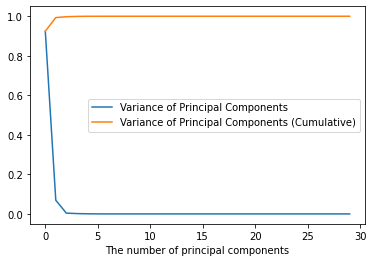

In [ ]:
# 绘制主成分解释差异图
plt.plot(variance, label='Variance of Principal Components')
plt.plot(np.cumsum(variance), label='Variance of Principal Components (Cumulative)')
plt.xlabel('The number of principal components')
plt.legend()

主成分输入 - comp_X.shape: (301, 30)


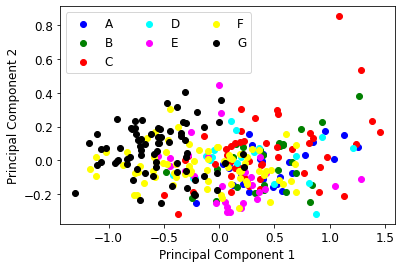

In [ ]:
# 使用前两个主成分绘制散点图
comp_X = pca.transform(X)
print('主成分输入 - comp_X.shape:', comp_X.shape)

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
for label, color in zip(np.unique(df.iloc[:,-1]), colors):
    class_embeddings = comp_X[df.iloc[:,-1] == label]
    plt.rcParams.update({'font.size': 12})
    plt.scatter(class_embeddings[:, 0], class_embeddings[:,1], c=color, label=label)
    plt.legend(ncol=3)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")

部分类别可以根据前两个主成分进行大致分类， 比如G与D/B/A/C

## 4.2 &nbsp;使用降维后的数据作为输入

In [ ]:
# 交叉验证
clf = RandomForestClassifier(max_depth=5, random_state=0)
cv = 3
val_score = cross_val(comp_X, y, clf, cv, random_state=32, shuffle=True)
val_score

Cross Validation: 1 - Accuracy: 0.5643564356435643
Cross Validation: 2 - Accuracy: 0.55
Cross Validation: 3 - Accuracy: 0.56


,CV_1,CV_2,CV_3,Mean
accuracy,0.564356,0.55,0.56,0.558119


利用主成分分析降维能够提高模型分类精度

## 4.3 &nbsp;使用正则化/标准化后的数据作为输入

基本模型交叉验证精度（RandomForestClassifier）：<br>
Cross Validation: 1 - Accuracy: 0.4752475247524752 <br>
Cross Validation: 2 - Accuracy: 0.42<br>
Cross Validation: 3 - Accuracy: 0.44<br>

### 正则化后的数据



In [ ]:
X = df_n.iloc[:, :-1]
clf = RandomForestClassifier(max_depth=5, random_state=0)
cv = 3
val_score = cross_val(X, y, clf, cv, random_state=32, shuffle=True)
val_score

Cross Validation: 1 - Accuracy: 0.4752475247524752
Cross Validation: 2 - Accuracy: 0.42
Cross Validation: 3 - Accuracy: 0.44


,CV_1,CV_2,CV_3,Mean
accuracy,0.475248,0.42,0.44,0.445083


正则化对RandomForestClassifier的精度预测没有提升

In [ ]:
X = df_n.iloc[:, :-1]

# 主成分降维
n_components = 30 # 选择主成分个数
pca = PCA(n_components = n_components, random_state=3)
pca.fit(X)
variance = pca.explained_variance_ratio_
comp_X = pca.transform(X)

clf = RandomForestClassifier(max_depth=5, random_state=0)
cv = 3
val_score = cross_val(comp_X, y, clf, cv, random_state=32, shuffle=True)
val_score

Cross Validation: 1 - Accuracy: 0.504950495049505
Cross Validation: 2 - Accuracy: 0.53
Cross Validation: 3 - Accuracy: 0.54


,CV_1,CV_2,CV_3,Mean
accuracy,0.50495,0.53,0.54,0.524983


降维前正则化对RandomForestClassifier的精度预测有影响

### 标准化后的数据

In [ ]:
X = df_s.iloc[:, :-1]
clf = RandomForestClassifier(max_depth=5, random_state=0)
cv = 3
val_score = cross_val(X, y, clf, cv, random_state=32, shuffle=True)
val_score

Cross Validation: 1 - Accuracy: 0.4752475247524752
Cross Validation: 2 - Accuracy: 0.42
Cross Validation: 3 - Accuracy: 0.44


,CV_1,CV_2,CV_3,Mean
accuracy,0.475248,0.42,0.44,0.445083


标准化对RandomForestClassifier的精度预测没有提升

In [ ]:
X = df_s.iloc[:, :-1]

# 主成分降维
n_components = 30 # 选择主成分个数
pca = PCA(n_components = n_components, random_state=3)
pca.fit(X)
variance = pca.explained_variance_ratio_
comp_X = pca.transform(X)

clf = RandomForestClassifier(max_depth=5, random_state=0)
cv = 3
val_score = cross_val(comp_X, y, clf, cv, random_state=32, shuffle=True)
val_score

Cross Validation: 1 - Accuracy: 0.44554455445544555
Cross Validation: 2 - Accuracy: 0.5
Cross Validation: 3 - Accuracy: 0.55


,CV_1,CV_2,CV_3,Mean
accuracy,0.445545,0.5,0.55,0.498515


降维前标准化对RandomForestClassifier的精度预测有影响

## 4.4 &nbsp;处理类别分布不均匀

X_train.shape (before random over sampler):  (200, 701)
X_train.shape (after random over sampler):  (350, 701)
Cross Validation: 1 - Accuracy: 0.4158415841584158
Cross Validation: 2 - Accuracy: 0.39
Cross Validation: 3 - Accuracy: 0.39


,CV_1,CV_2,CV_3,Mean
accuracy,0.415842,0.39,0.39,0.398614


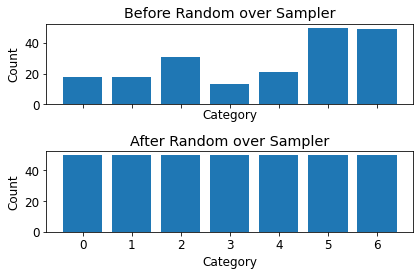

In [ ]:
# 对类别个数较少的样本进行随机取样
from imblearn.over_sampling import RandomOverSampler
# https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html

X = df.iloc[:, :-1]
# 交叉验证
cv = 3
skf = StratifiedKFold(n_splits=cv, random_state=32, shuffle=True)
val_score = []

k = 1
X = np.array(X)
for train_index, test_index in skf.split(X, y):
  # 查看各个类别个数
  # print('train -  {}   |   test -  {}'.format(
  #     np.bincount(y[train_index]), np.bincount(y[test_index])))
  X_train, X_test = X[train_index,:], X[test_index,:]
  y_train, y_test = y[train_index], y[test_index]
  
  if k == 1:
    print('X_train.shape (before random over sampler): ', X_train.shape)
    categories = np.arange(7)
    cat_count = [sum(y_train==ele) for ele in categories]
    fig, axs = plt.subplots(2,1, sharex=True)
    axs[0].bar(categories, cat_count)
    axs[0].set_xlabel('Category')
    axs[0].set_ylabel('Count')
    axs[0].set_title('Before Random over Sampler')

  # 对类别个数较少的样本进行随机取样
  ros = RandomOverSampler(sampling_strategy='not majority',
                          random_state = 3)
  X_train, y_train = ros.fit_resample(X_train, y_train)

  if k == 1:
    print('X_train.shape (after random over sampler): ', X_train.shape)
    cat_count = [sum(y_train==ele) for ele in categories]
    axs[1].bar(categories, cat_count)
    axs[1].set_xlabel('Category')
    axs[1].set_ylabel('Count')
    axs[1].set_title('After Random over Sampler')
    plt.tight_layout()

  # 训练模型
  clf = RandomForestClassifier(max_depth=5, random_state=0)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = sum(y_pred==y_test)  / len(y_test)
  val_score.append(accuracy)

  print(f'Cross Validation: {k} - Accuracy: {accuracy}')
  k += 1

val_score = pd.DataFrame(data = np.array([val_score+[np.mean(val_score)]]), 
                             index=['accuracy'],
                             # CV -- Cross Validation
                            columns=['CV_'+str(i) for i in range(1, cv+1)]+['Mean'])
val_score

对类别个数较少的样本进行随机取样会影响预测（分类）精度

In [ ]:
# 对类别个数较少的样本进行随机取样 + 主成分降维
from imblearn.over_sampling import RandomOverSampler
# https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html

X = df.iloc[:, :-1]
# 交叉验证
cv = 3
skf = StratifiedKFold(n_splits=cv, random_state=32, shuffle=True)
val_score = []

# 主成分降维
n_components = 30 # 选择主成分个数
pca = PCA(n_components = n_components, random_state=3)
pca.fit(X)
variance = pca.explained_variance_ratio_
comp_X = pca.transform(X)

k = 1
for train_index, test_index in skf.split(comp_X, y):
  # 查看各个类别个数
  # print('train -  {}   |   test -  {}'.format(
  #     np.bincount(y[train_index]), np.bincount(y[test_index])))
  X_train, X_test = comp_X[train_index,:], comp_X[test_index,:]
  y_train, y_test = y[train_index], y[test_index]
  
  if k == 1:
    print('X_train.shape (before random over sampler): ', X_train.shape)

  # 对类别个数较少的样本进行随机取样
  ros = RandomOverSampler(sampling_strategy='not majority',
                          random_state = 3)
  X_train, y_train = ros.fit_resample(X_train, y_train)

  if k == 1:
    print('X_train.shape (after random over sampler): ', X_train.shape)

  # 训练模型
  clf = RandomForestClassifier(max_depth=5, random_state=0)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = sum(y_pred==y_test)  / len(y_test)
  val_score.append(accuracy)

  print(f'Cross Validation: {k} - Accuracy: {accuracy}')
  k += 1

val_score = pd.DataFrame(data = np.array([val_score+[np.mean(val_score)]]), 
                             index=['accuracy'],
                             # CV -- Cross Validation
                            columns=['CV_'+str(i) for i in range(1, cv+1)]+['Mean'])
val_score

X_train.shape (before random over sampler):  (200, 30)
X_train.shape (after random over sampler):  (350, 30)
Cross Validation: 1 - Accuracy: 0.5346534653465347
Cross Validation: 2 - Accuracy: 0.58
Cross Validation: 3 - Accuracy: 0.66


,CV_1,CV_2,CV_3,Mean
accuracy,0.534653,0.58,0.66,0.591551


处理样本类别标签不均衡 + 主成分分析 可以提高RandomForestClassifier的分类精度

In [ ]:
# 封装 主成分降维 + 均衡样本类别 + 交叉验证 函数
def cross_val_pca_ros(X, y, clf, cv, 
                      n_components=30, # 主成分个数
                      pca_random_state=3,
                      ros_random_state=3, 
                      split_random_state=32, split_shuffle=True):

  # 主成分降维
  pca = PCA(n_components = n_components, random_state=pca_random_state)
  pca.fit(X)
  comp_X = pca.transform(X)

  # 交叉验证
  skf = StratifiedKFold(n_splits=cv, random_state=split_random_state, shuffle=split_shuffle)
  val_score = []

  k = 1
  for train_index, test_index in skf.split(comp_X, y):
    # 查看各个类别个数
    # print('train -  {}   |   test -  {}'.format(
    #     np.bincount(y[train_index]), np.bincount(y[test_index])))
    X_train, X_test = comp_X[train_index,:], comp_X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
    if k == 1:
      print('X_train.shape (before random over sampler): ', X_train.shape)

    # 对类别个数较少的样本进行随机取样
    ros = RandomOverSampler(sampling_strategy='not majority',
                            random_state = ros_random_state)
    X_train, y_train = ros.fit_resample(X_train, y_train)

    if k == 1:
      print('X_train.shape (after random over sampler): ', X_train.shape)

    # 训练模型
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = sum(y_pred==y_test)  / len(y_test)
    val_score.append(accuracy)

    print(f'Cross Validation: {k} - Accuracy: {accuracy}')
    k += 1

  val_score = pd.DataFrame(data = np.array([val_score+[np.mean(val_score)]]), 
                              index=['accuracy'],
                              # CV -- Cross Validation
                              columns=['CV_'+str(i) for i in range(1, cv+1)]+['Mean'])
  return val_score
    

In [ ]:
X = df.iloc[:,:-1]
clf = RandomForestClassifier(max_depth=5, random_state=0)
cv=3
val_score = cross_val_pca_ros(X, y, clf, cv)
val_score

X_train.shape (before random over sampler):  (200, 30)
X_train.shape (after random over sampler):  (350, 30)
Cross Validation: 1 - Accuracy: 0.5346534653465347
Cross Validation: 2 - Accuracy: 0.58
Cross Validation: 3 - Accuracy: 0.66


,CV_1,CV_2,CV_3,Mean
accuracy,0.534653,0.58,0.66,0.591551


## 4.5 &nbsp;**手动尝试其他模型**
https://scikit-learn.org/stable/supervised_learning.html

In [ ]:
X = df.iloc[:,:-1]

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=2)
val_score = cross_val_pca_ros(X, y, clf, cv=3)
val_score

X_train.shape (before random over sampler):  (200, 30)
X_train.shape (after random over sampler):  (350, 30)
Cross Validation: 1 - Accuracy: 0.4158415841584158
Cross Validation: 2 - Accuracy: 0.36
Cross Validation: 3 - Accuracy: 0.35


,CV_1,CV_2,CV_3,Mean
accuracy,0.415842,0.36,0.35,0.375281


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
val_score = cross_val_pca_ros(X, y, clf, cv=3)
val_score

X_train.shape (before random over sampler):  (200, 30)
X_train.shape (after random over sampler):  (350, 30)
Cross Validation: 1 - Accuracy: 0.3465346534653465
Cross Validation: 2 - Accuracy: 0.33
Cross Validation: 3 - Accuracy: 0.36


,CV_1,CV_2,CV_3,Mean
accuracy,0.346535,0.33,0.36,0.345512


In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(20),
                    random_state=1, max_iter=2000)
val_score = cross_val_pca_ros(X, y, clf, cv=3, n_components=5)
val_score

X_train.shape (before random over sampler):  (200, 5)
X_train.shape (after random over sampler):  (350, 5)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Cross Validation: 1 - Accuracy: 0.5346534653465347


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Cross Validation: 2 - Accuracy: 0.5
Cross Validation: 3 - Accuracy: 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


,CV_1,CV_2,CV_3,Mean
accuracy,0.534653,0.5,0.5,0.511551


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1,
     max_depth=3, random_state=0)
val_score = cross_val_pca_ros(X, y, clf, cv=3)
val_score

X_train.shape (before random over sampler):  (200, 30)
X_train.shape (after random over sampler):  (350, 30)
Cross Validation: 1 - Accuracy: 0.5346534653465347
Cross Validation: 2 - Accuracy: 0.55
Cross Validation: 3 - Accuracy: 0.57


,CV_1,CV_2,CV_3,Mean
accuracy,0.534653,0.55,0.57,0.551551


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
val_score = cross_val_pca_ros(X, y, clf, cv=3)
val_score

X_train.shape (before random over sampler):  (200, 30)
X_train.shape (after random over sampler):  (350, 30)
Cross Validation: 1 - Accuracy: 0.5841584158415841
Cross Validation: 2 - Accuracy: 0.57
Cross Validation: 3 - Accuracy: 0.62


,CV_1,CV_2,CV_3,Mean
accuracy,0.584158,0.57,0.62,0.591386


## 4.6 &nbsp;自动调参模型
http://lucky521.github.io/blog/machinelearning/2019/07/20/AutoML.html#ray-tune <br>
以AutoGluon为例：https://auto.gluon.ai/stable/index.html

In [ ]:
!pip install --upgrade mxnet
!pip install autogluon
from autogluon.tabular import TabularPredictor
# https://auto.gluon.ai/dev/api/autogluon.task.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49.1 MB 1.7 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 210 kB 5.2 MB/s 
     |████████████████████████████████| 61 kB 12 kB/s 
     |████████████████████████████████| 48 kB 5.9 MB/s 
     |████████████████████████████████| 65 kB 3.7 MB/s 
     |████████████████████████████████| 274 kB 55.8 MB/s 
     |████████████████████████████████| 149 kB 78.1 MB/s 
     |████████████████████████████████| 59 kB 7.0 MB/s 
     |████████████████████████████████| 132 kB 57.8 MB/s 
     |████████████████████████████████| 802 kB 56.5 MB/s 
     |████████████████████████████████| 1.0 MB 47.1 MB/s 
     |█████

In [ ]:
X = df.iloc[:, :-1]

# 主成分降维
pca = PCA(n_components = n_components, random_state=3)
pca.fit(X)
comp_X = pca.transform(X)

# 交叉验证
cv = 3
split_random_state = 32
split_shuffle = True
skf = StratifiedKFold(n_splits=cv, random_state=split_random_state, shuffle=split_shuffle)

train_idx_list = []
test_idx_list = []
for train_index, test_index in skf.split(comp_X, y):
  train_idx_list.append(train_index)
  test_idx_list.append(test_index)

In [ ]:
train_idx_list

[array([  0,   1,   3,   4,   6,   8,   9,  11,  13,  14,  15,  17,  19,
         20,  21,  23,  24,  25,  28,  29,  32,  34,  36,  37,  42,  45,
         46,  47,  49,  50,  51,  53,  54,  55,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  69,  70,  71,  73,  74,  77,  78,  80,  81,
         83,  84,  85,  86,  87,  88,  90,  91,  92,  93,  95,  96,  98,
         99, 100, 101, 103, 104, 105, 108, 109, 110, 112, 115, 116, 117,
        118, 119, 121, 122, 123, 124, 125, 127, 128, 131, 133, 134, 136,
        139, 140, 141, 142, 143, 144, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 158, 160, 161, 162, 164, 165, 167, 168, 169, 170, 171,
        172, 174, 175, 178, 179, 180, 181, 183, 185, 186, 187, 192, 193,
        197, 198, 199, 200, 201, 202, 205, 206, 207, 209, 210, 212, 213,
        215, 217, 218, 219, 221, 222, 223, 229, 230, 233, 234, 235, 236,
        238, 239, 240, 241, 243, 244, 246, 247, 248, 251, 252, 253, 254,
        256, 257, 258, 259, 260, 261, 262, 263, 265

In [ ]:
test_idx_list

[array([  2,   5,   7,  10,  12,  16,  18,  22,  26,  27,  30,  31,  33,
         35,  38,  39,  40,  41,  43,  44,  48,  52,  56,  57,  58,  68,
         72,  75,  76,  79,  82,  89,  94,  97, 102, 106, 107, 111, 113,
        114, 120, 126, 129, 130, 132, 135, 137, 138, 145, 146, 147, 157,
        159, 163, 166, 173, 176, 177, 182, 184, 188, 189, 190, 191, 194,
        195, 196, 203, 204, 208, 211, 214, 216, 220, 224, 225, 226, 227,
        228, 231, 232, 237, 242, 245, 249, 250, 255, 264, 266, 269, 270,
        271, 278, 280, 283, 284, 286, 287, 288, 292, 293]),
 array([  0,   3,   6,  13,  14,  17,  19,  21,  23,  24,  25,  32,  34,
         36,  45,  47,  49,  51,  55,  59,  62,  64,  67,  69,  71,  73,
         78,  80,  81,  86,  90,  98,  99, 100, 101, 103, 108, 109, 116,
        118, 122, 123, 124, 125, 128, 136, 143, 148, 149, 150, 151, 152,
        155, 158, 160, 164, 165, 167, 169, 170, 171, 178, 180, 183, 186,
        197, 199, 200, 210, 212, 213, 221, 223, 230, 233, 236, 2

### 分解

In [ ]:
# 第一折交叉验证
k = 0
train_index = train_idx_list[k]
test_index = test_idx_list[k]
X_train, X_test = comp_X[train_index,:], comp_X[test_index,:]
y_train, y_test = y[train_index], y[test_index]

# 对类别个数较少的样本进行随机取样
ros_random_state = 3
ros = RandomOverSampler(sampling_strategy='not majority',
                        random_state = ros_random_state)
X_train, y_train = ros.fit_resample(X_train, y_train)

# 将训练集测试集转换成DataFrame
columns = [i for i in range(X_train.shape[1])] + ['class']
df_train = pd.DataFrame(data = np.c_[X_train,y_train], columns=columns)
df_test = pd.DataFrame(data = np.c_[X_test,y_test], columns=columns)
print('df_train.shape: ', df_train.shape)
print('df_test.shape: ', df_test.shape)
df_train

df_train.shape:  (350, 31)
df_test.shape:  (101, 31)


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,class
0,0.928029,0.139828,0.056479,0.083269,0.000771,-0.002367,0.002010,0.002988,-0.000690,0.000190,...,-0.000097,-2.287565e-04,-0.000084,-0.000096,0.000142,-0.000011,0.000024,-0.000221,0.000035,3.0
1,0.500198,-0.139084,-0.007415,0.015465,0.009884,-0.011634,-0.000812,-0.002252,0.000216,-0.001128,...,-0.000015,1.842980e-05,-0.000055,-0.000080,0.000070,0.000004,0.000027,0.000011,-0.000027,3.0
2,0.099270,0.011751,0.049923,-0.006326,0.007542,-0.006259,-0.000833,0.004061,-0.002925,0.000163,...,-0.000309,9.527968e-05,-0.000206,0.000179,-0.000122,0.000085,0.000007,0.000024,-0.000022,3.0
3,0.158403,-0.017652,-0.037274,-0.033106,0.002240,-0.008727,0.000978,0.002554,0.002533,-0.001010,...,-0.000096,7.016327e-05,0.000026,0.000020,-0.000240,-0.000030,0.000058,0.000165,-0.000049,3.0
4,-0.083505,0.003078,-0.040245,-0.007745,-0.002738,0.000320,-0.000041,0.003566,0.001308,-0.002772,...,-0.000231,6.399025e-07,0.000142,-0.000014,0.000025,0.000125,0.000014,-0.000022,-0.000087,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,-0.096417,0.017902,-0.045468,-0.024189,0.005535,-0.008270,0.003059,0.001753,0.000616,0.000523,...,-0.000260,-1.287702e-04,-0.000013,-0.000077,0.000014,-0.000115,0.000102,-0.000069,0.000024,4.0
346,-0.391714,-0.022541,-0.052190,-0.023230,0.009378,-0.006197,0.001665,0.000592,-0.001086,-0.000703,...,-0.000016,-2.829474e-05,-0.000124,-0.000199,-0.000022,-0.000178,0.000056,0.000085,0.000116,4.0
347,0.214769,-0.248432,0.013382,0.016912,0.007771,-0.007231,-0.009024,0.002350,0.000190,0.002928,...,0.000043,-1.321283e-04,0.000111,-0.000195,-0.000023,-0.000151,0.000044,-0.000153,-0.000020,4.0
348,1.043132,-0.148936,0.053438,-0.072834,0.034204,-0.010489,0.000371,0.002395,0.003599,-0.001394,...,-0.000113,-2.294466e-04,0.000041,0.000037,-0.000142,0.000031,-0.000016,-0.000102,0.000007,4.0


In [ ]:
# 自动训练测试模型
predictor = TabularPredictor(label='class',
                             problem_type = 'multiclass',
                             eval_metric = 'accuracy',).fit(df_train)

Level 25:autogluon.common.utils.utils:No path specified. Models will be saved in: "AutogluonModels/ag-20220810_235843/"
INFO:autogluon.tabular.learner.default_learner:Beginning AutoGluon training ...
INFO:autogluon.tabular.learner.default_learner:AutoGluon will save models to "AutogluonModels/ag-20220810_235843/"
INFO:autogluon.tabular.learner.default_learner:AutoGluon Version:  0.5.2
INFO:autogluon.tabular.learner.default_learner:Python Version:     3.7.13
INFO:autogluon.tabular.learner.default_learner:Operating System:   Linux
INFO:autogluon.tabular.learner.default_learner:Train Data Rows:    350
INFO:autogluon.tabular.learner.default_learner:Train Data Columns: 30
INFO:autogluon.tabular.learner.default_learner:Label Column: class
INFO:autogluon.tabular.learner.default_learner:Preprocessing data ...
INFO:autogluon.tabular.learner.default_learner:Train Data Class Count: 7
INFO:autogluon.tabular.learner.default_learner:Using Feature Generators to preprocess the data ...
INFO:autogluon.

In [ ]:
test_result = predictor.leaderboard(df_test, silent=True)
test_result

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTreesEntr,0.683168,0.828571,0.216429,0.227986,1.773354,0.216429,0.227986,1.773354,1,True,10
1,NeuralNetFastAI,0.623762,0.828571,0.026223,0.045380,5.583869,0.026223,0.045380,5.583869,1,True,3
2,ExtraTreesGini,0.623762,0.871429,0.215986,0.238972,2.256859,0.215986,0.238972,2.256859,1,True,9
3,LightGBMXT,0.603960,0.842857,0.013604,0.014185,2.421338,0.013604,0.014185,2.421338,1,True,4
4,NeuralNetTorch,0.594059,0.857143,0.009825,0.007581,2.545461,0.009825,0.007581,2.545461,1,True,12
5,RandomForestGini,0.584158,0.828571,0.215404,0.205132,1.795646,0.215404,0.205132,1.795646,1,True,6
6,RandomForestEntr,0.574257,0.828571,0.116770,0.104212,2.444776,0.116770,0.104212,2.444776,1,True,7
7,LightGBM,0.524752,0.857143,0.024053,0.048153,2.131747,0.024053,0.048153,2.131747,1,True,5
8,LightGBMLarge,0.455446,0.885714,0.045322,0.008072,4.071391,0.045322,0.008072,4.071391,1,True,13
9,WeightedEnsemble_L2,0.455446,0.885714,0.049314,0.008571,4.447722,0.003992,0.000499,0.376331,2,True,14


In [ ]:
# 查看模型
predictor.get_model_names()

['KNeighborsUnif',
 'KNeighborsDist',
 'NeuralNetFastAI',
 'LightGBMXT',
 'LightGBM',
 'RandomForestGini',
 'RandomForestEntr',
 'CatBoost',
 'ExtraTreesGini',
 'ExtraTreesEntr',
 'XGBoost',
 'NeuralNetTorch',
 'LightGBMLarge',
 'WeightedEnsemble_L2']

In [ ]:
# 查看最佳模型配置
predictor.info()['model_info']['RandomForestEntr']

{'ag_args_fit': {'get_features_kwargs': None,
  'get_features_kwargs_extra': None,
  'ignored_type_group_raw': None,
  'ignored_type_group_special': None,
  'max_memory_usage_ratio': 1.0,
  'max_time_limit': None,
  'max_time_limit_ratio': 1.0,
  'min_time_limit': 0,
  'predict_1_batch_size': None,
  'valid_raw_types': ['bool', 'int', 'float', 'category'],
  'valid_special_types': None},
 'eval_metric': 'accuracy',
 'feature_metadata': <autogluon.common.features.feature_metadata.FeatureMetadata at 0x7f5e21d93410>,
 'features': ['0',
  '1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29'],
 'fit_time': 2.4447755813598633,
 'hyperparameters': {'bootstrap': True,
  'criterion': 'entropy',
  'max_leaf_nodes': 15000,
  'n_estimators': 300,
  'n_jobs': -1,
  'random_state': 0},
 'hyperparameters_fit': {'n_estimators': 300},
 'h

In [ ]:
y_pred = predictor.predict(df_test, model='ExtraTreesEntr')
y_true = df_test.iloc[:,-1]
# 识别准确率 (同 score_test)
accuracy = sum(y_pred==y_true)  / len(y_true)
accuracy

0.6831683168316832

### 封装

#### 之前的优化模型

In [ ]:
def clf_train_k(X, y, clf, k, train_idx_list, test_idx_list, 
                n_components=30, pca_random_state=3,
                ros_random_state = 3):
  # 主成分降维
  pca = PCA(n_components = n_components, random_state=pca_random_state)
  pca.fit(X)
  comp_X = pca.transform(X)

  train_index = train_idx_list[k]
  test_index = test_idx_list[k]
  X_train, X_test = comp_X[train_index,:], comp_X[test_index,:]
  y_train, y_test = y[train_index], y[test_index]

  # 对类别个数较少的样本进行随机取样
  
  ros = RandomOverSampler(sampling_strategy='not majority',
                          random_state = ros_random_state)
  X_train, y_train = ros.fit_resample(X_train, y_train)

  # 训练模型
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = sum(y_pred==y_test)  / len(y_test)
  

  return clf, accuracy


In [ ]:
mean_acc = 0
cv = 3
for k in range(cv):
  clf = RandomForestClassifier(max_depth=5, random_state=0)
  clf, accuracy = clf_train_k(X, y, clf, k, train_idx_list, test_idx_list)
  mean_acc += accuracy
  print(f'第{k+1}折交叉验证精度：', accuracy)
print('平均精度：', mean_acc/cv)

第1折交叉验证精度： 0.5346534653465347
第2折交叉验证精度： 0.58
第3折交叉验证精度： 0.66
平均精度： 0.5915511551155116


#### AutoML自动优化模型

In [ ]:
def autotrain_k(X, y, k, train_idx_list, test_idx_list, 
                n_components=30, pca_random_state=3,
                ros_random_state = 3):
  # 主成分降维
  pca = PCA(n_components = n_components, random_state=pca_random_state)
  pca.fit(X)
  comp_X = pca.transform(X)

  train_index = train_idx_list[k]
  test_index = test_idx_list[k]
  X_train, X_test = comp_X[train_index,:], comp_X[test_index,:]
  y_train, y_test = y[train_index], y[test_index]

  # 对类别个数较少的样本进行随机取样
  
  ros = RandomOverSampler(sampling_strategy='not majority',
                          random_state = ros_random_state)
  X_train, y_train = ros.fit_resample(X_train, y_train)

  # 将训练集测试集转换成DataFrame
  columns = [i for i in range(X_train.shape[1])] + ['class']
  df_train = pd.DataFrame(data = np.c_[X_train,y_train], columns=columns)
  df_test = pd.DataFrame(data = np.c_[X_test,y_test], columns=columns)

  # 自动训练测试模型
  predictor = TabularPredictor(label='class',
                               problem_type = 'multiclass',
                               eval_metric = 'accuracy',
                               verbosity = 1, # 显示少部分信息
                               ).fit(df_train)

  return predictor, df_test


In [ ]:
# 第一折交叉验证
k = 0
predictor, df_test = autotrain_k(X, y, k, train_idx_list, test_idx_list)
test_result1 = predictor.leaderboard(df_test, silent=True)
test_result1

Level 25:autogluon.common.utils.utils:No path specified. Models will be saved in: "AutogluonModels/ag-20220810_235956/"
Level 25:autogluon.core.trainer.abstract_trainer:AutoGluon will gauge predictive performance using evaluation metric: 'accuracy'


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTreesEntr,0.683168,0.828571,0.115485,0.102648,0.929581,0.115485,0.102648,0.929581,1,True,10
1,NeuralNetFastAI,0.623762,0.828571,0.024512,0.035844,1.432273,0.024512,0.035844,1.432273,1,True,3
2,ExtraTreesGini,0.623762,0.871429,0.116576,0.102775,0.824197,0.116576,0.102775,0.824197,1,True,9
3,LightGBMXT,0.603960,0.842857,0.012152,0.033456,1.531163,0.012152,0.033456,1.531163,1,True,4
4,NeuralNetTorch,0.594059,0.857143,0.010060,0.005224,1.162107,0.010060,0.005224,1.162107,1,True,12
5,RandomForestGini,0.584158,0.828571,0.114915,0.219567,1.879066,0.114915,0.219567,1.879066,1,True,6
6,RandomForestEntr,0.574257,0.828571,0.118574,0.222197,2.367795,0.118574,0.222197,2.367795,1,True,7
7,LightGBM,0.524752,0.857143,0.022511,0.012000,2.154920,0.022511,0.012000,2.154920,1,True,5
8,LightGBMLarge,0.455446,0.885714,0.047478,0.012424,3.495181,0.047478,0.012424,3.495181,1,True,13
9,WeightedEnsemble_L2,0.455446,0.885714,0.050860,0.012949,3.825585,0.003382,0.000525,0.330405,2,True,14


In [ ]:
# 第二折交叉验证
k = 1
predictor, df_test = autotrain_k(X, y, k, train_idx_list, test_idx_list)
test_result2 = predictor.leaderboard(df_test, silent=True)
test_result2

Level 25:autogluon.common.utils.utils:No path specified. Models will be saved in: "AutogluonModels/ag-20220811_000039/"
Level 25:autogluon.core.trainer.abstract_trainer:AutoGluon will gauge predictive performance using evaluation metric: 'accuracy'


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForestEntr,0.64,0.928571,0.119026,0.102701,1.023745,0.119026,0.102701,1.023745,1,True,7
1,RandomForestGini,0.63,0.900000,0.114413,0.102658,0.933901,0.114413,0.102658,0.933901,1,True,6
2,LightGBMXT,0.62,0.928571,0.014302,0.006615,0.744616,0.014302,0.006615,0.744616,1,True,4
3,XGBoost,0.62,0.914286,0.015697,0.008366,1.780112,0.015697,0.008366,1.780112,1,True,11
4,NeuralNetTorch,0.59,0.871429,0.008667,0.005143,1.047634,0.008667,0.005143,1.047634,1,True,12
5,CatBoost,0.58,0.957143,0.005370,0.001968,18.835688,0.005370,0.001968,18.835688,1,True,8
6,WeightedEnsemble_L2,0.58,0.957143,0.009447,0.002465,19.367904,0.004077,0.000498,0.532216,2,True,14
7,ExtraTreesGini,0.58,0.885714,0.116414,0.103549,0.827991,0.116414,0.103549,0.827991,1,True,9
8,ExtraTreesEntr,0.58,0.928571,0.116617,0.102453,0.822315,0.116617,0.102453,0.822315,1,True,10
9,LightGBMLarge,0.57,0.885714,0.025051,0.006408,4.028451,0.025051,0.006408,4.028451,1,True,13


In [ ]:
# 第三折交叉验证
k = 2
predictor,df_test = autotrain_k(X, y, k, train_idx_list, test_idx_list)
test_result3 = predictor.leaderboard(df_test, silent=True)
test_result3

Level 25:autogluon.common.utils.utils:No path specified. Models will be saved in: "AutogluonModels/ag-20220811_000113/"
Level 25:autogluon.core.trainer.abstract_trainer:AutoGluon will gauge predictive performance using evaluation metric: 'accuracy'


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTreesEntr,0.71,0.871429,0.117344,0.102623,0.925925,0.117344,0.102623,0.925925,1,True,10
1,CatBoost,0.69,0.914286,0.005646,0.002576,20.790232,0.005646,0.002576,20.790232,1,True,8
2,WeightedEnsemble_L2,0.69,0.914286,0.009221,0.003086,21.120637,0.003575,0.000510,0.330405,2,True,14
3,RandomForestGini,0.66,0.842857,0.115303,0.102635,0.928696,0.115303,0.102635,0.928696,1,True,6
4,ExtraTreesGini,0.64,0.842857,0.116951,0.102536,0.835356,0.116951,0.102536,0.835356,1,True,9
5,RandomForestEntr,0.64,0.785714,0.117781,0.102951,1.023092,0.117781,0.102951,1.023092,1,True,7
6,LightGBMXT,0.63,0.900000,0.030241,0.006961,0.921898,0.030241,0.006961,0.921898,1,True,4
7,XGBoost,0.61,0.871429,0.012620,0.008200,1.375731,0.012620,0.008200,1.375731,1,True,11
8,NeuralNetTorch,0.60,0.857143,0.011919,0.008281,1.076912,0.011919,0.008281,1.076912,1,True,12
9,LightGBM,0.60,0.900000,0.048599,0.010535,1.311308,0.048599,0.010535,1.311308,1,True,5


In [ ]:
# 按照首字母顺序重新排列模型
test_result1 = test_result1.sort_values('model')
test_result2 = test_result2.sort_values('model')
test_result3 = test_result3.sort_values('model')

In [ ]:
test_result_all = pd.concat((test_result1, test_result2,test_result3))
test_result_all = test_result_all.groupby(['model']).mean()
test_result_all.sort_values(by=['score_test'], ascending=False)

,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
model,,,,,,,,,,,
ExtraTreesEntr,0.657723,0.876190,0.116482,0.102575,0.892607,0.116482,0.102575,0.892607,1.0,1.0,10.0
RandomForestGini,0.624719,0.857143,0.114877,0.141620,1.247221,0.114877,0.141620,1.247221,1.0,1.0,6.0
RandomForestEntr,0.618086,0.847619,0.118460,0.142616,1.471544,0.118460,0.142616,1.471544,1.0,1.0,7.0
LightGBMXT,0.617987,0.890476,0.018898,0.015677,1.065893,0.018898,0.015677,1.065893,1.0,1.0,4.0
ExtraTreesGini,0.614587,0.866667,0.116647,0.102953,0.829181,0.116647,0.102953,0.829181,1.0,1.0,9.0
NeuralNetTorch,0.594686,0.861905,0.010216,0.006216,1.095551,0.010216,0.006216,1.095551,1.0,1.0,12.0
NeuralNetFastAI,0.577921,0.847619,0.026043,0.027012,0.894550,0.026043,0.027012,0.894550,1.0,1.0,3.0
WeightedEnsemble_L2,0.575149,0.919048,0.023176,0.006167,14.771376,0.003678,0.000511,0.397675,2.0,1.0,14.0
CatBoost,0.571848,0.909524,0.004878,0.002392,21.044268,0.004878,0.002392,21.044268,1.0,1.0,8.0


ExtraTreesEntr 平均表现最佳，但每次交叉验证模型对应模型参数都不相同，因此不能确定ExtraTreesEntr的具体参数配置

## 4.7 &nbsp;根据自动调参模型确定最终模型
使用所有数据训练

In [ ]:
n_components = 30
pca_random_state = 3
ros_random_state = 3

X = df.iloc[:,:-1]

# 主成分降维
pca = PCA(n_components = n_components, random_state=pca_random_state)
pca.fit(X)
comp_X = pca.transform(X)

# 使用所有数据训练、测试
X_train, X_test = comp_X, comp_X
y_train, y_test = y, y

# 对类别个数较少的样本进行随机取样

ros = RandomOverSampler(sampling_strategy='not majority',
                        random_state = ros_random_state)
X_train, y_train = ros.fit_resample(X_train, y_train)

# 将训练集测试集转换成DataFrame
columns = [i for i in range(X_train.shape[1])] + ['class']
df_train = pd.DataFrame(data = np.c_[X_train,y_train], columns=columns)
df_test = pd.DataFrame(data = np.c_[X_test,y_test], columns=columns)

# 自动训练测试模型
predictor = TabularPredictor(label='class',
                              problem_type = 'multiclass',
                              eval_metric = 'accuracy',
                              verbosity = 1, # 显示少部分信息
                              ).fit(df_train)

Level 25:autogluon.common.utils.utils:No path specified. Models will be saved in: "AutogluonModels/ag-20220811_000149/"
Level 25:autogluon.core.trainer.abstract_trainer:AutoGluon will gauge predictive performance using evaluation metric: 'accuracy'


In [ ]:
# 测试训练数据
predictor.leaderboard(df_test, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.970100,0.914286,0.236515,0.110237,2.974036,0.003935,0.000520,0.341578,2,True,14
1,ExtraTreesEntr,0.963455,0.895238,0.218377,0.102695,0.930031,0.218377,0.102695,0.930031,1,True,10
2,LightGBM,0.960133,0.876190,0.059111,0.011930,1.913142,0.059111,0.011930,1.913142,1,True,5
3,CatBoost,0.956811,0.876190,0.005124,0.003579,24.038169,0.005124,0.003579,24.038169,1,True,8
4,NeuralNetTorch,0.956811,0.876190,0.010516,0.005255,2.180157,0.010516,0.005255,2.180157,1,True,12
5,XGBoost,0.956811,0.876190,0.014203,0.007023,1.702427,0.014203,0.007023,1.702427,1,True,11
6,LightGBMXT,0.956811,0.866667,0.068116,0.012377,2.440791,0.068116,0.012377,2.440791,1,True,4
7,LightGBMLarge,0.956811,0.866667,0.118110,0.017116,7.282402,0.118110,0.017116,7.282402,1,True,13
8,RandomForestGini,0.953488,0.866667,0.216934,0.102543,0.923740,0.216934,0.102543,0.923740,1,True,6
9,ExtraTreesGini,0.950166,0.857143,0.223722,0.102630,0.934250,0.223722,0.102630,0.934250,1,True,9


In [ ]:
# 加载需要提要的测试数据
df_submit = pd.read_csv('/content/data/近红外光谱数据_测试集.csv', header=None, index_col=0)
df_submit

,1,2,3,4,5,6,7,8,9,10,...,692,693,694,695,696,697,698,699,700,701
0,,,,,,,,,,,,,,,,,,,,,
1,0.128543,0.128437,0.128335,0.128242,0.128168,0.128117,0.128095,0.128100,0.128124,0.128161,...,0.267570,0.267704,0.267853,0.268036,0.268266,0.268549,0.268883,0.269242,0.269592,0.269933
2,0.122109,0.122045,0.121987,0.121941,0.121909,0.121890,0.121884,0.121889,0.121912,0.121961,...,0.260191,0.260166,0.260158,0.260168,0.260208,0.260303,0.260476,0.260686,0.260868,0.261006
3,0.134325,0.134297,0.134276,0.134268,0.134277,0.134302,0.134341,0.134391,0.134455,0.134539,...,0.250831,0.251036,0.251206,0.251404,0.251659,0.251950,0.252246,0.252533,0.252813,0.253103
4,0.147585,0.147581,0.147577,0.147570,0.147565,0.147568,0.147582,0.147607,0.147651,0.147721,...,0.268502,0.268714,0.268927,0.269148,0.269390,0.269678,0.270028,0.270397,0.270718,0.270972
5,0.118670,0.118687,0.118702,0.118716,0.118735,0.118765,0.118813,0.118880,0.118968,0.119078,...,0.246137,0.246257,0.246371,0.246547,0.246808,0.247107,0.247388,0.247633,0.247850,0.248065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.127848,0.127808,0.127785,0.127797,0.127838,0.127899,0.127964,0.128027,0.128100,0.128196,...,0.269321,0.269370,0.269383,0.269435,0.269564,0.269742,0.269933,0.270119,0.270301,0.270491
73,0.131379,0.131342,0.131304,0.131269,0.131246,0.131246,0.131276,0.131336,0.131419,0.131517,...,0.255337,0.255395,0.255445,0.255543,0.255714,0.255925,0.256141,0.256347,0.256547,0.256760
74,0.130476,0.130445,0.130434,0.130455,0.130499,0.130553,0.130600,0.130634,0.130677,0.130751,...,0.265218,0.265246,0.265234,0.265259,0.265367,0.265537,0.265742,0.265945,0.266115,0.266256


In [ ]:
X_submit = df_submit
# 主成分降维
comp_X_submit = pca.transform(X_submit)
print('comp_X_submit.shape:', comp_X_submit.shape)

# 转化为dataframe格式，以供预测
columns = [i for i in range(comp_X_submit.shape[1])] 
comp_X_submit_df = pd.DataFrame(data = comp_X_submit, columns=columns)
comp_X_submit_df

comp_X_submit.shape: (76, 30)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.175082,-0.146153,0.035632,0.021096,0.027883,-0.007445,-0.000693,-0.002013,-0.002765,0.000467,...,-6.800040e-05,-0.000193,0.000108,0.000232,-0.000143,0.000065,0.000089,0.000008,0.000089,-0.000087
1,0.152232,-0.255989,0.031277,0.048899,-0.014380,-0.004634,-0.006077,0.001551,-0.001293,0.000430,...,-1.998098e-04,-0.000005,0.000103,-0.000026,0.000030,0.000080,-0.000161,0.000037,-0.000056,0.000175
2,-0.058556,0.217477,-0.038830,0.014121,0.003520,-0.004664,-0.003018,0.003804,-0.002605,-0.001931,...,-3.185941e-04,0.000184,-0.000106,0.000359,0.000062,-0.000008,0.000114,-0.000074,0.000178,0.000041
3,0.290734,0.397307,-0.031447,0.012655,0.013854,-0.003125,-0.001606,0.005386,-0.001695,-0.002036,...,-2.567786e-04,0.000024,-0.000035,0.000114,0.000058,0.000026,-0.000104,0.000050,0.000008,-0.000046
4,-0.195989,-0.029469,-0.056392,-0.006877,0.003874,-0.007249,0.001571,0.001458,-0.000960,-0.000666,...,1.992224e-04,0.000025,-0.000222,0.000063,0.000038,-0.000051,-0.000070,-0.000009,0.000027,0.000043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.301612,0.038319,-0.050459,-0.019406,-0.013843,0.004146,0.000340,-0.002375,-0.000237,-0.003004,...,-9.002711e-07,-0.000088,-0.000026,-0.000041,0.000072,0.000158,-0.000102,-0.000032,-0.000033,-0.000023
72,0.004095,0.107762,-0.021578,-0.010109,-0.004354,0.006813,-0.000120,-0.001732,-0.002483,-0.000006,...,7.088083e-05,-0.000250,-0.000035,0.000036,0.000090,0.000228,0.000008,-0.000118,-0.000095,0.000076
73,0.185800,0.079107,-0.025451,-0.021266,-0.008537,-0.000157,-0.002816,-0.002008,-0.000226,-0.000096,...,1.099423e-05,-0.000135,-0.000055,-0.000116,0.000098,0.000049,-0.000010,0.000047,-0.000097,-0.000052
74,0.416043,-0.052026,-0.009459,-0.000678,-0.027302,0.000557,0.000815,-0.002897,-0.002013,-0.001024,...,4.649199e-05,-0.000142,-0.000011,-0.000067,0.000071,0.000041,-0.000153,0.000027,0.000029,-0.000158


In [ ]:
# 使用自动优化后确定的模型ExtraTreesEntr来作最终预测
y_pred_submit = predictor.predict(comp_X_submit_df, model='ExtraTreesEntr')
y_pred_submit

0     5.0
1     4.0
2     2.0
3     3.0
4     4.0
     ... 
71    1.0
72    1.0
73    1.0
74    1.0
75    2.0
Name: class, Length: 76, dtype: float64

In [ ]:
# 使用['A', 'B', 'C', ...] 代替 [0,1,2,...]
categories = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
for i, cat in enumerate(categories):
    y_pred_submit = y_pred_submit.replace(i, cat)
y_pred_submit

0     F
1     E
2     C
3     D
4     E
     ..
71    B
72    B
73    B
74    B
75    C
Name: class, Length: 76, dtype: object

categories: ['A', 'B', 'C', 'D', 'E', 'F', 'G']
cat_count: [7, 6, 13, 3, 9, 20, 18]
sum: 76


Text(0.5, 0, 'Category')

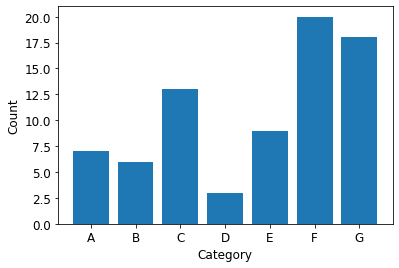

In [ ]:
cat_count = [sum(y_pred_submit==ele) for ele in categories]
# 绘制测试类别分布图
print('categories:', categories)
print('cat_count:', cat_count)
print('sum:', sum(cat_count))
plt.bar(categories, cat_count)
plt.ylabel('Count')
plt.xlabel('Category')

In [ ]:
# 保存预测结果
y_pred_submit = pd.DataFrame(y_pred_submit)
y_pred_submit.index.name = '预测集样本序号'
y_pred_submit.index = y_pred_submit.index+1
y_pred_submit.columns = ['类别预测值']
y_pred_submit

,类别预测值
预测集样本序号,
1,F
2,E
3,C
4,D
5,E
...,...
72,B
73,B
74,B


In [ ]:
y_pred_submit.to_csv('/content/预测结果.csv', encoding='utf_8_sig')